# 3D Visualization of Search Space Results

### Imports

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

### Important Functions

In [2]:
def plot_3D(x, y, z, xlabel, ylabel, zlabel, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    plt.title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

def txt_to_list_of_dicts(file_path):
    with open(file_path, "r") as file:
        content = file.read()
        dict_strings = content.split("\n}")
        dicts = []
        for dict_string in dict_strings:
            kv_pairs = dict_string.strip().split("\n")
            current_dict = {}
            for kv in kv_pairs:
                if ":" in kv:
                    key = kv.split(":")[0].strip().strip('"')
                    value = kv.split(":")[1].strip().strip('"').strip(',')
                    if "." in value:
                        value = float(value)
                    else:
                        value = int(value)
                    current_dict[key] = value
            if current_dict:
                dicts.append(current_dict)
    return dicts

#### Path to results.txt

In [5]:
path = '../../results/results/results_1.txt'
lst_of_dict = txt_to_list_of_dicts(path)

#### Draw Plots

<IPython.core.display.Javascript object>


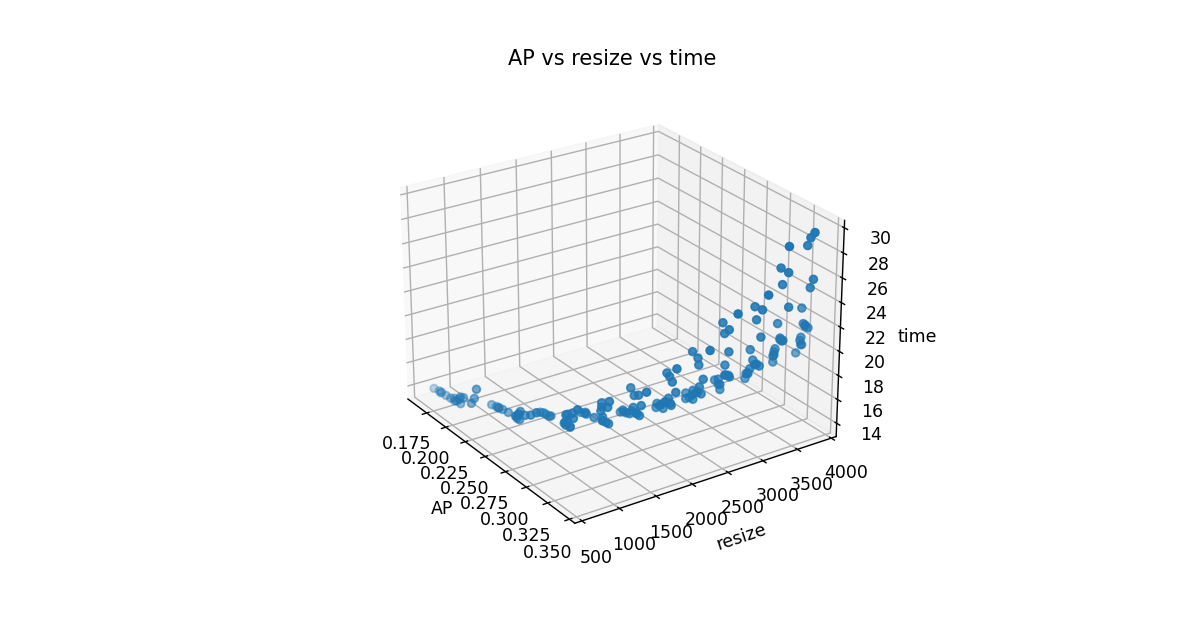

<IPython.core.display.Javascript object>


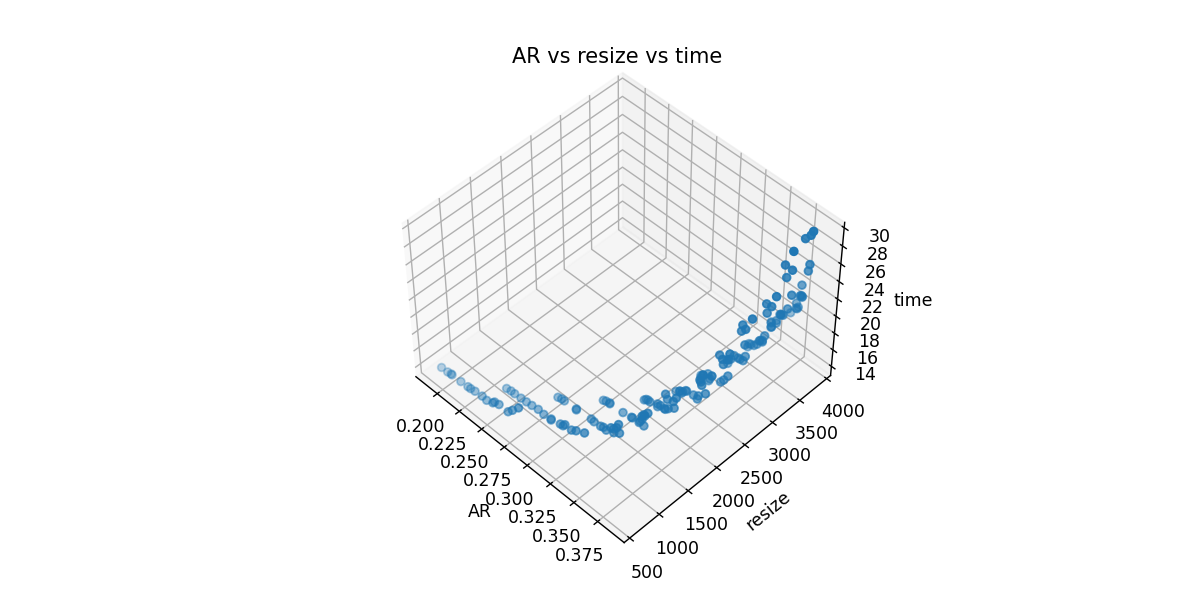

In [6]:
df = pd.DataFrame.from_dict(lst_of_dict)
AP = df['mAP_all']
AR = df['AR_all']
resize = df['resize']
time = df['average_time_image']
plot_3D(AP, resize, time, 'AP', 'resize', 'time','AP vs resize vs time')
plot_3D(AR, resize, time, 'AR', 'resize', 'time','AR vs resize vs time')